## Dependendencias 

In [28]:
import pandas as pd # manipulación de datos
import cufflinks as cf # gráficos
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
cf.go_offline()

## Lectura de datos 

In [15]:
df = pd.read_csv('data/antropometricos.csv')
df['Sexo_bin'] = (df['Sexo']=='M').astype(int)
df.shape

(24, 4)

In [16]:
df.head()

,Estatura,Talla,Sexo,Sexo_bin
0,171,26.5,H,0
1,155,23.0,M,1
2,180,28.0,H,0
3,168,24.0,M,1
4,165,26.5,H,0


## Inspección Visual

In [17]:
df.iplot(kind='scatter',x='Estatura',y='Talla',categories='Sexo')

/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



## Partición 

In [18]:
X_train,X_valid,y_train,y_valid = train_test_split(df[['Estatura','Talla']],df['Sexo_bin'])

## Aprendizaje (Supervisado) $\mathcal{X}\to\{+,-\}$

In [23]:
modelo = DecisionTreeClassifier()

In [24]:
modelo.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6, 0.875, 'x[1] <= 24.75\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.4, 0.625, 'x[0] <= 160.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.375, 'x[0] <= 161.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]')]

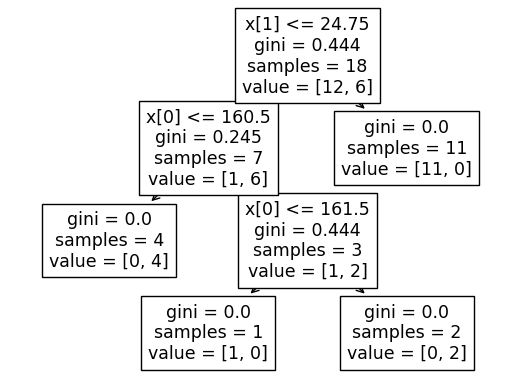

In [27]:
plot_tree(modelo)

## Generalización del modelo 

In [30]:
accuracy_score(y_train,modelo.predict(X_train)),accuracy_score(y_valid,modelo.predict(X_valid))

(1.0, 1.0)

In [31]:
confusion_matrix(y_train,modelo.predict(X_train)),confusion_matrix(y_valid,modelo.predict(X_valid))

(array([[12,  0],
        [ 0,  6]]),
 array([[4, 0],
        [0, 2]]))